## **Data Mining Project : Obesity**

Contributors:

+ ITDSIU21001 - Phan Quốc Anh

+ ITDSIU21009 - Vũ Vỹ Khang

+ ITDSIU21130 - Nguyễn Minh Việt

+ ITDSIU20089 - Trần Nguyễn Đông Triều

# 1. IMPORT LIBRARIES, MODULES AND LOADING THE DATA

In [ ]:
%%capture
!pip install scikit-learn xgboost lightgbm catboost

In [ ]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import t

In [ ]:
# URLs of the datasets
url1 = 'https://github.com/quocanhphan/Predictive-Analytics-for-Obesity-Levels/raw/main/data/ObesityDataSet_raw_and_data_sinthetic.csv'
url2 = 'https://github.com/quocanhphan/Predictive-Analytics-for-Obesity-Levels/raw/main/data/obesity.csv'
# Loading the datasets
data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)

In [ ]:
data1.head()

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [ ]:
sorted(data1.columns)

['Age',
 'CAEC',
 'CALC',
 'CH2O',
 'FAF',
 'FAVC',
 'FCVC',
 'Gender',
 'Height',
 'MTRANS',
 'NCP',
 'NObeyesdad',
 'SCC',
 'SMOKE',
 'TUE',
 'Weight',
 'family_history_with_overweight']

In [ ]:
data2.head()

Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0                               1     0   2.0  3.0     1      0   
1       0  21.0                               1     0   3.0  3.0     1      1   
2       1  23.0                               1     0   2.0  3.0     1      0   
3       1  27.0                               0     0   3.0  3.0     1      0   
4       1  22.0                               0     0   2.0  1.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0   2.0    0  0.0  1.0     0           0     0          0   
1   3.0    1  3.0  0.0     1           0     0          0   
2   2.0    0  2.0  1.0     2           0     0          0   
3   2.0    0  2.0  0.0     2           0     0          0   
4   2.0    0  0.0  0.0     1           0     0          0   

   Public_Transportation  Walking  NObeyesdad  
0                      1        0           0  
1                      1        0           0  
2                      1        0           0  
3                      0        1           0  
4                      1        0           0

In [ ]:
sorted(data2.columns)

['Age',
 'Automobile',
 'Bike',
 'CAEC',
 'CALC',
 'CH2O',
 'FAF',
 'FAVC',
 'FCVC',
 'Gender',
 'Motorbike',
 'NCP',
 'NObeyesdad',
 'Public_Transportation',
 'SCC',
 'SMOKE',
 'TUE',
 'Walking',
 'family_history_with_overweight']

In [ ]:
unique_to_data1 = data1.columns.difference(data2.columns)
unique_to_data2 = data2.columns.difference(data1.columns)

# Printing out the unique columns
print("Columns unique to data1:", unique_to_data1)
print("Columns unique to data2:", unique_to_data2)

Columns unique to data1: Index(['Height', 'MTRANS', 'Weight'], dtype='object')
Columns unique to data2: Index(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'], dtype='object')


Since the column **'MTRANS'** from data1 can be presented by the 5 columns **'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'** from data2, we can drop the column'MTRANS' and use the 5 mentioned columns as a replacement!

In [ ]:
# Removing the 'MTRANS' column from data1
data1 = data1.drop('MTRANS', axis=1)

In [ ]:
# Selecting only the transportation-related columns from data2
transport_columns = ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
data2_selected = data2[transport_columns]

Now we **concatenate** the two datasets vertically, assuming they have a compatible index and the same rows order.

The combined_data keep all all values from data1 (except 'MTRANS') and add the 5 transportation-related columns from data2)

In [ ]:
if len(data1) == len(data2):
    combined_data = pd.concat([data1, data2_selected], axis=1)
else:
    print("The datasets have different numbers of rows; check the data alignment or identifiers.")

Since **NObeyesdad** is the** target** column. We will make it the last column for easier view

In [ ]:
# Making 'NObeyesdad' the last column
target_column = combined_data.pop('NObeyesdad')  # Removes and returns the target column
combined_data['NObeyesdad'] = target_column

In [ ]:
combined_data.head(10)

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  ...  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no  ...   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes  ...   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no  ...   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no  ...   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no  ...   
5  29.0    Male    1.62    53.0   Sometimes  yes   2.0  3.0   no    no  ...   
6  23.0  Female    1.50    55.0   Sometimes  yes   3.0  3.0   no    no  ...   
7  22.0    Male    1.64    53.0   Sometimes   no   2.0  3.0   no    no  ...   
8  24.0    Male    1.78    64.0  Frequently  yes   3.0  3.0   no    no  ...   
9  22.0    Male    1.72    68.0          no  yes   2.0  3.0   no    no  ...   

   family_history_with_overweight  FAF  TUE       CAEC Automobile  Bike  \
0                             yes  0.0  1.0  Sometimes          0     0   
1                             yes  3.0  0.0  Sometimes          0     0   
2                             yes  2.0  1.0  Sometimes          0     0   
3                              no  2.0  0.0  Sometimes          0     0   
4                              no  0.0  0.0  Sometimes          0     0   
5                              no  0.0  0.0  Sometimes          1     0   
6                             yes  1.0  0.0  Sometimes          0     0   
7                              no  3.0  0.0  Sometimes          0     0   
8                             yes  1.0  1.0  Sometimes          0     0   
9                             yes  1.0  1.0  Sometimes          0     0   

   Motorbike  Public_Transportation  Walking           NObeyesdad  
0          0                      1        0        Normal_Weight  
1          0                      1        0        Normal_Weight  
2          0                      1        0        Normal_Weight  
3          0                      0        1   Overweight_Level_I  
4          0                      1        0  Overweight_Level_II  
5          0                      0        0        Normal_Weight  
6          1                      0        0        Normal_Weight  
7          0                      1        0        Normal_Weight  
8          0                      1        0        Normal_Weight  
9          0                      1        0        Normal_Weight  

[10 rows x 21 columns]

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

# 2. DATA PREPROCESSING AND EDA

#### **PREPROCESSING**

**Check missing values**

In [ ]:
combined_data.isnull().sum().to_frame().rename(columns={0:'NULL count'})

NULL count
Age                                      0
Gender                                   0
Height                                   0
Weight                                   0
CALC                                     0
FAVC                                     0
FCVC                                     0
NCP                                      0
SCC                                      0
SMOKE                                    0
CH2O                                     0
family_history_with_overweight           0
FAF                                      0
TUE                                      0
CAEC                                     0
Automobile                               0
Bike                                     0
Motorbike                                0
Public_Transportation                    0
Walking                                  0
NObeyesdad                               0

**Check duplicated**

In [ ]:
combined_data.duplicated().any()

True

In [ ]:
combined_data.shape

(2111, 21)

In [ ]:
duplicated_data = combined_data[combined_data.duplicated(keep=False)].sort_values(by=combined_data.columns.tolist())
duplicated_data.shape

(33, 21)

In [ ]:
# remove duplicate
dropped_data = combined_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
# after remove duplicate
dropped_data.shape

(2087, 21)

In [ ]:
dropped_data.describe(include='all').transpose()

count unique             top  freq      mean  \
Age                             2087.0    NaN             NaN   NaN  24.35309   
Gender                            2087      2            Male  1052       NaN   
Height                          2087.0    NaN             NaN   NaN  1.702674   
Weight                          2087.0    NaN             NaN   NaN  86.85873   
CALC                              2087      4       Sometimes  1380       NaN   
FAVC                              2087      2             yes  1844       NaN   
FCVC                            2087.0    NaN             NaN   NaN  2.421466   
NCP                             2087.0    NaN             NaN   NaN  2.701179   
SCC                               2087      2              no  1991       NaN   
SMOKE                             2087      2              no  2043       NaN   
CH2O                            2087.0    NaN             NaN   NaN  2.004749   
family_history_with_overweight    2087      2             yes  1722       NaN   
FAF                             2087.0    NaN             NaN   NaN  1.012812   
TUE                             2087.0    NaN             NaN   NaN  0.663035   
CAEC                              2087      4       Sometimes  1761       NaN   
Automobile                      2087.0    NaN             NaN   NaN  0.218495   
Bike                            2087.0    NaN             NaN   NaN  0.003354   
Motorbike                       2087.0    NaN             NaN   NaN  0.005271   
Public_Transportation           2087.0    NaN             NaN   NaN  0.746526   
Walking                         2087.0    NaN             NaN   NaN  0.026354   
NObeyesdad                        2087      7  Obesity_Type_I   351       NaN   

                                      std   min        25%        50%  \
Age                              6.368801  14.0  19.915937  22.847618   
Gender                                NaN   NaN        NaN        NaN   
Height                           0.093186  1.45   1.630178   1.701584   
Weight                          26.190847  39.0       66.0    83.1011   
CALC                                  NaN   NaN        NaN        NaN   
FAVC                                  NaN   NaN        NaN        NaN   
FCVC                             0.534737   1.0        2.0   2.396265   
NCP                              0.764614   1.0   2.697467        3.0   
SCC                                   NaN   NaN        NaN        NaN   
SMOKE                                 NaN   NaN        NaN        NaN   
CH2O                             0.608284   1.0   1.590922        2.0   
family_history_with_overweight        NaN   NaN        NaN        NaN   
FAF                              0.853475   0.0   0.124505        1.0   
TUE                              0.608153   0.0        0.0   0.630866   
CAEC                                  NaN   NaN        NaN        NaN   
Automobile                       0.413324   0.0        0.0        0.0   
Bike                             0.057831   0.0        0.0        0.0   
Motorbike                        0.072426   0.0        0.0        0.0   
Public_Transportation            0.435104   0.0        0.0        1.0   
Walking                          0.160223   0.0        0.0        0.0   
NObeyesdad                            NaN   NaN        NaN        NaN   

                                       75%    max  
Age                                   26.0   61.0  
Gender                                 NaN    NaN  
Height                            1.769491   1.98  
Weight                          108.015907  173.0  
CALC                                   NaN    NaN  
FAVC                                   NaN    NaN  
FCVC                                   3.0    3.0  
NCP                                    3.0    4.0  
SCC                                    NaN    NaN  
SMOKE                                  NaN    NaN  
CH2O                              2.466193    3.0  
family_history_with

#### **EDA**

Boxplot for **'Age', 'Height', 'FCVC', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE'**

In [ ]:
numeric_columns = dropped_data.select_dtypes(include=np.number)

# Convert Height from meters to centimeters
numeric_columns.loc[:, 'Height'] = numeric_columns['Height'] * 100

# Ensure Age is integer
numeric_columns.loc[:, 'Age'] = numeric_columns['Age'].astype(int)

In [ ]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']

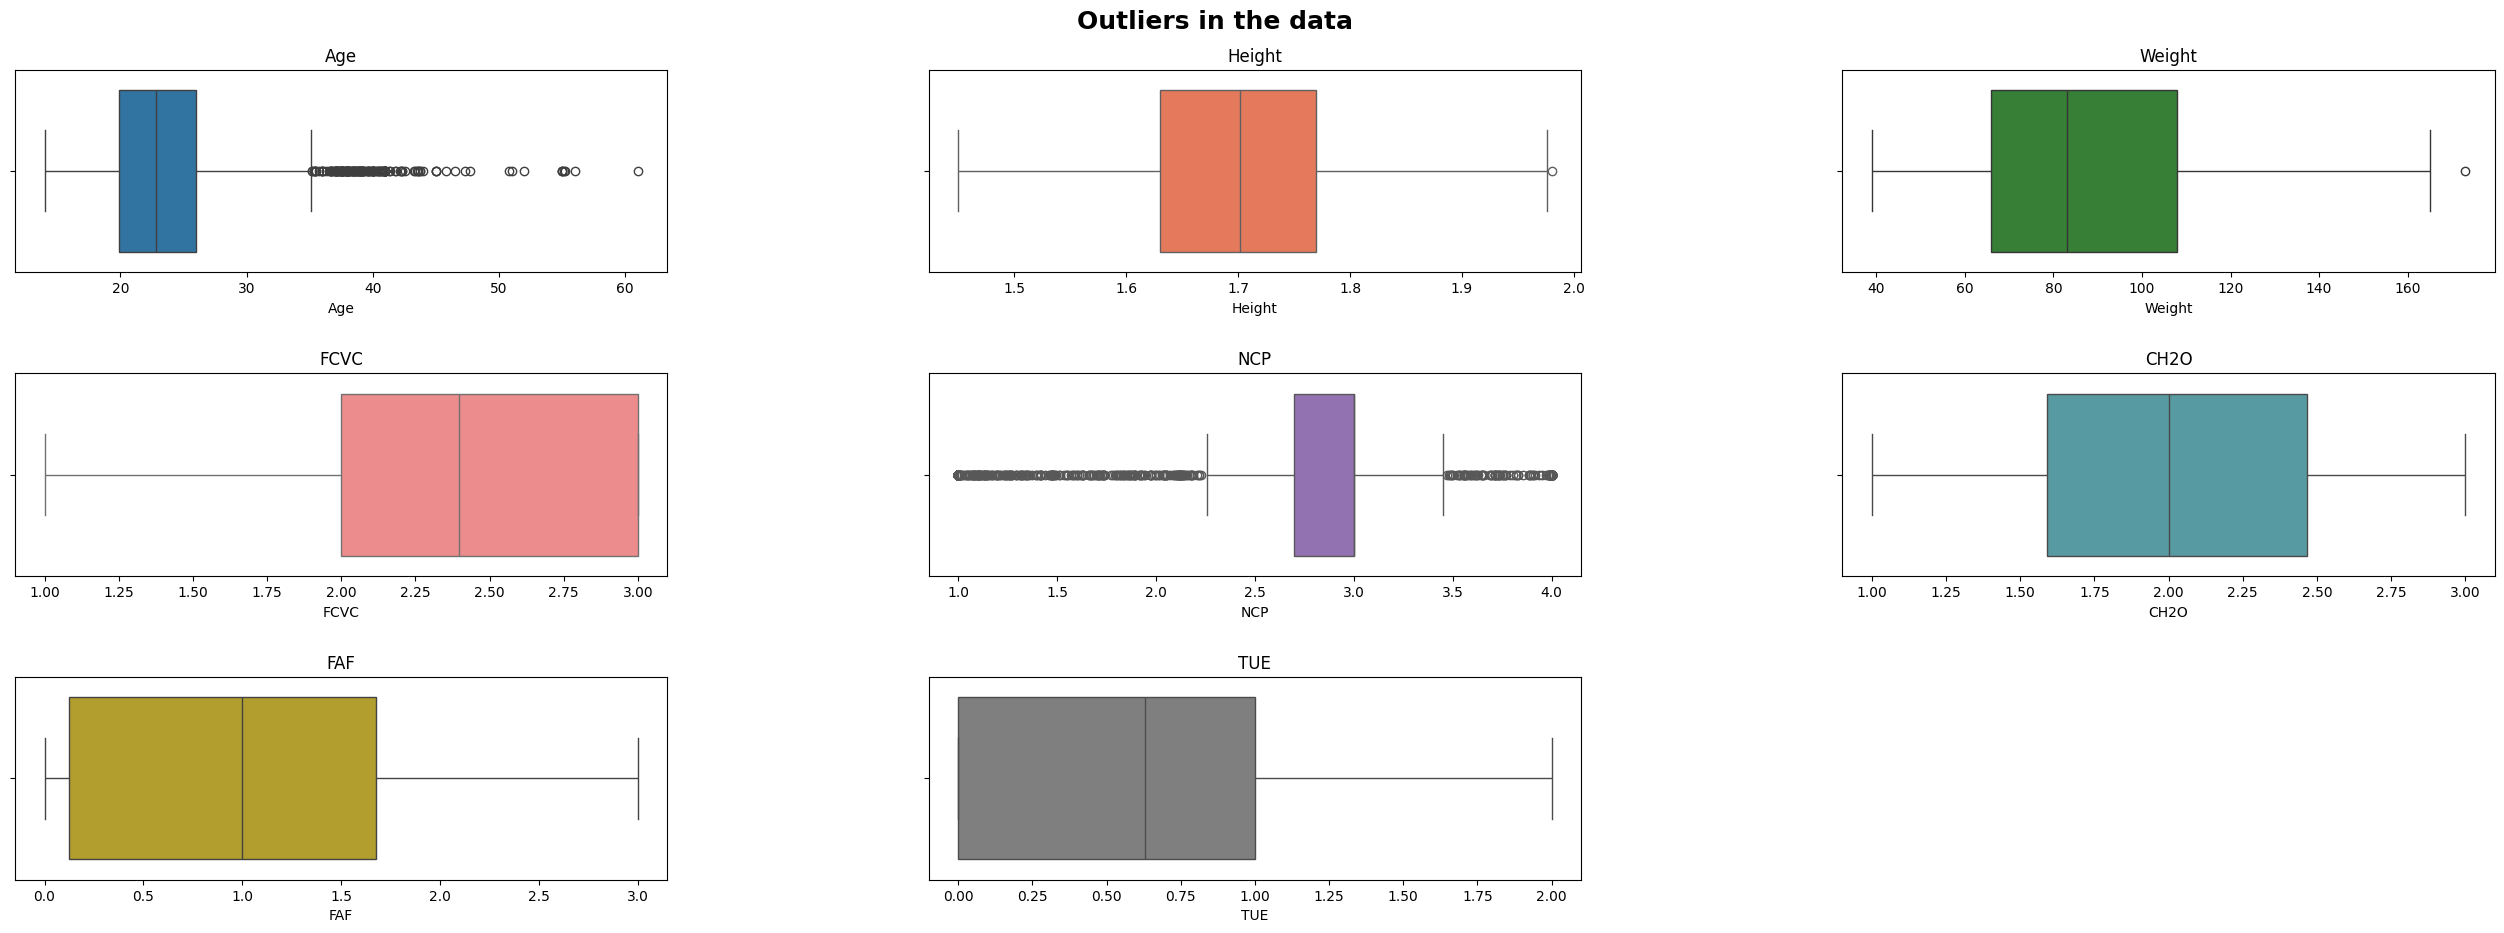

In [ ]:
numeric_columns = dropped_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'], axis=1)
fig = plt.figure(figsize=[32,10])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(3,3, i+1);
    ax = sns.boxplot(data = dropped_data, x=col ,  color= colors[i]);
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col}')
    ax.grid(False)
plt.show()

⦿ Outliers present in Age

⦿ Rest features do not have presence of outliers

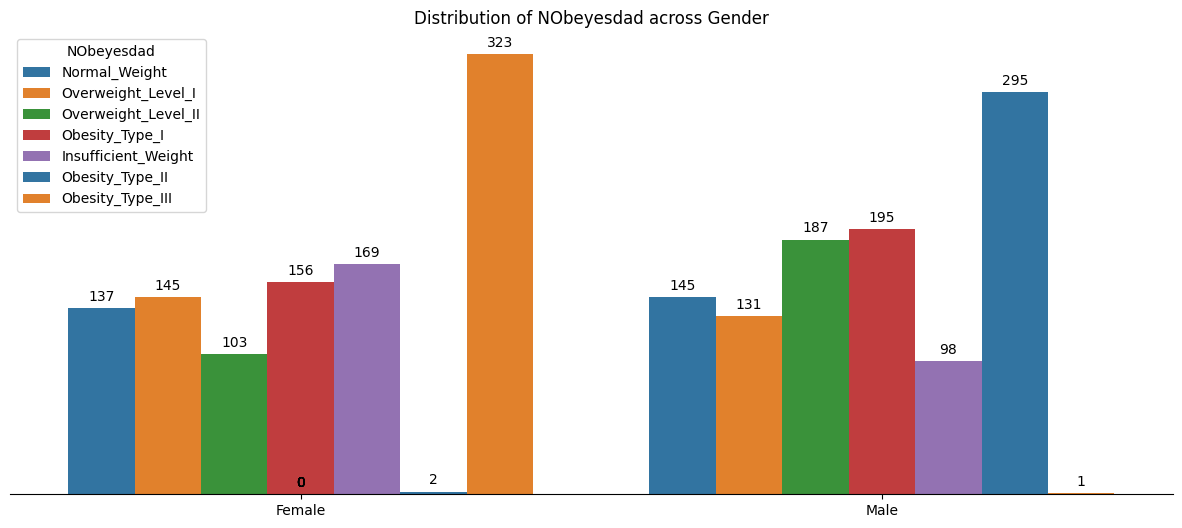

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='NObeyesdad', data=dropped_data, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

⦿ Obesity Type II is most common among Males, while Obesity Type III is most common among Females.

In [ ]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = dropped_data[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']

    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)

    # Count Plot
    sns.countplot(data=dropped_data, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

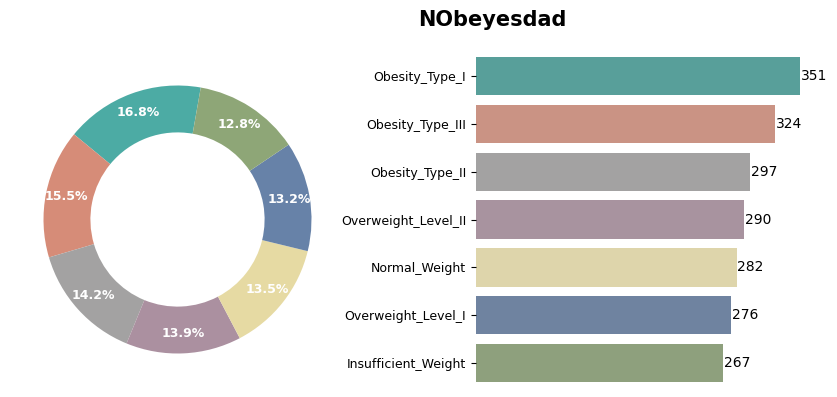

In [ ]:
showplot("NObeyesdad")

We have highest number of people with Ovesity_Type I having share of 16.8%

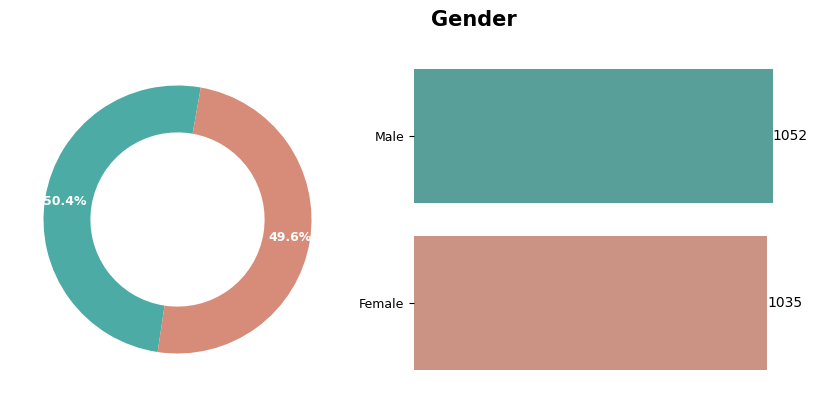

In [ ]:
showplot('Gender')

✩ Gender distribution is fairly equal in the dataset

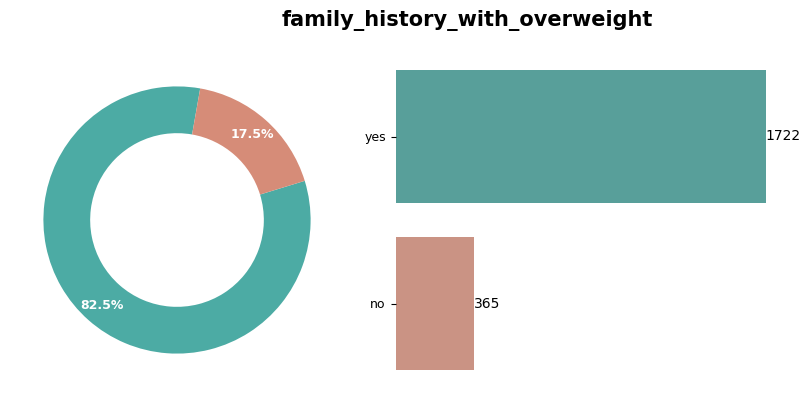

In [ ]:
showplot("family_history_with_overweight")

82.5% people have a family history with Overweight

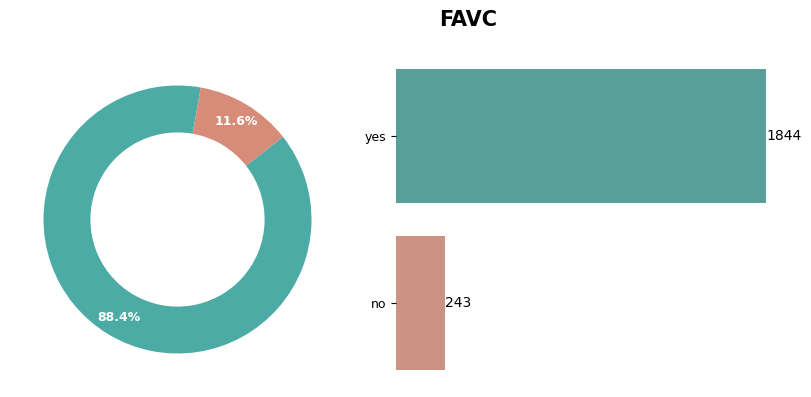

In [ ]:
showplot("FAVC")

88.4% people Frequently consume high caloric food

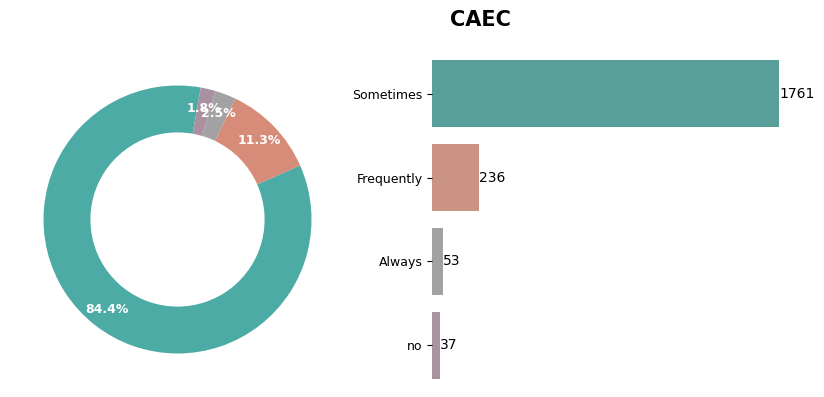

In [ ]:
showplot("CAEC")

84.4% sometimes consumes food between meals while ~1.8% says No meals in between

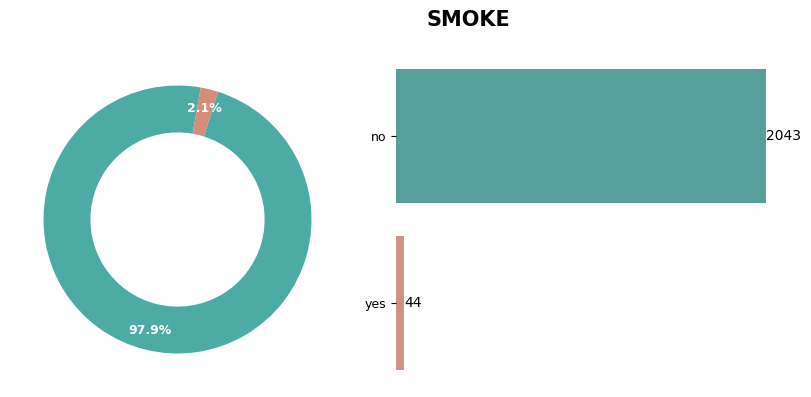

In [ ]:
showplot("SMOKE")

97.9% are non-Smokers. Doesn't sound correct, but let's trust the data. 🚭

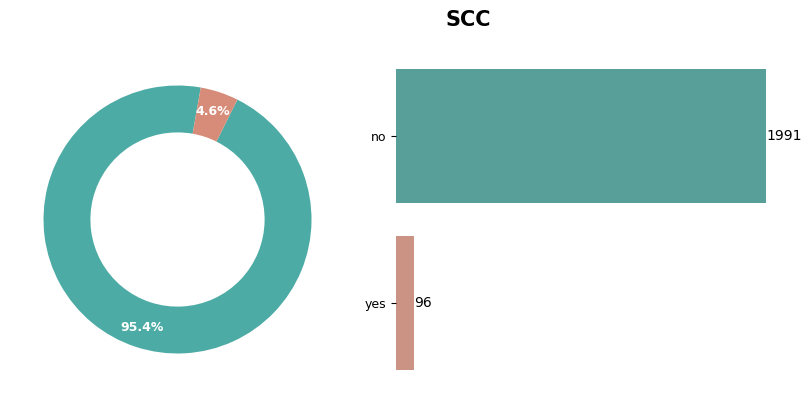

In [ ]:
showplot("SCC")

95.4% don't bother monitoring calorie consumption.

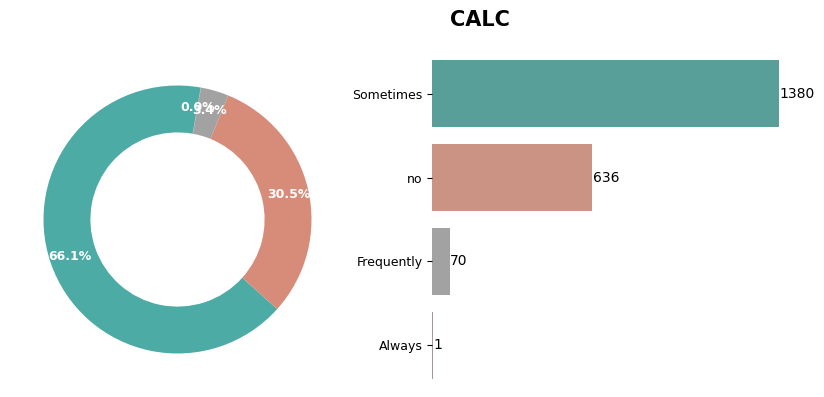

In [ ]:
showplot("CALC")

66.1% consumes alcohol sometimes while 3.4% does Frequent.

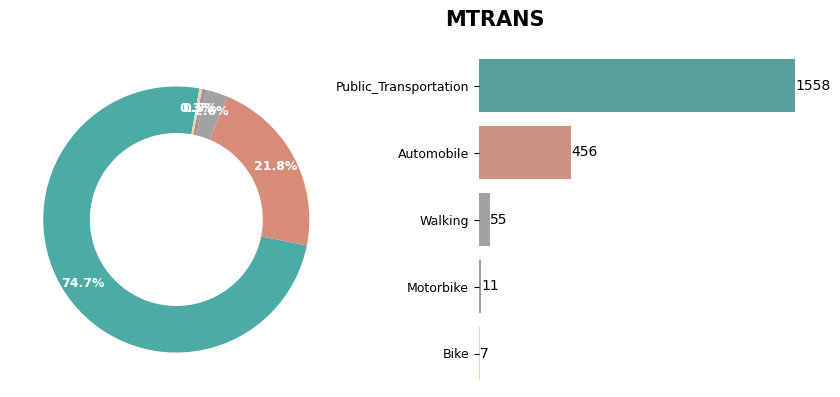

In [ ]:
# Combine transportation columns into a single column
dropped_data['MTRANS'] = dropped_data[['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']].idxmax(axis=1)

# Count the occurrences of each category in 'MTRANS'
category_counts = dropped_data['MTRANS'].value_counts()
category_names = category_counts.index

showplot("MTRANS")

**97.4% use some form of vehicles while only ~2.6% prefers walking/using bike That's concerning!**

# 3. MODELLING AND EVALUATION

Decision Tree Model

In [ ]:
# Import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# assessment models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
# Ignore Any Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
label_encoders = {}
for column in dropped_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dropped_data[column] = le.fit_transform(dropped_data[column])
    label_encoders[column] = le
# Features and target
X = dropped_data.drop('NObeyesdad', axis=1)
y = dropped_data['NObeyesdad']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Class label:
+ Class 0: Normal_Weight
+ Class 1: Obesity_Type_I
+ Class 2: Obesity_Type_II
+ Class 3: Obesity_Type_III
+ Class 4: Overweight_Level_I
+ Class 5: Overweight_Level_II
+ Class 6: Underweight

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)
print(y_pred)

[2 3 1 0 3 5 6 4 0 1 3 2 4 1 6 5 5 3 6 5 4 5 5 0 2 2 0 0 0 2 5 1 2 3 6 4 1
 1 0 5 0 2 5 4 1 5 3 5 1 4 2 0 2 4 4 4 5 2 6 5 6 2 1 3 5 3 2 5 6 2 6 1 2 5
 2 0 3 1 0 0 5 1 4 2 0 0 3 6 0 2 3 3 3 3 2 3 2 4 6 4 1 6 2 6 1 1 0 1 4 2 1
 3 2 0 4 3 5 3 5 3 0 5 2 0 5 4 5 1 5 1 3 0 6 2 5 2 6 5 5 5 4 5 1 5 4 1 5 4
 4 6 0 4 4 2 0 3 0 4 4 2 1 3 3 0 3 1 0 4 6 1 2 0 3 5 0 6 6 2 6 1 0 1 3 3 0
 6 1 3 6 6 3 3 2 1 4 0 2 5 6 1 2 4 2 5 6 2 2 6 5 2 0 3 3 6 3 3 4 4 6 4 3 0
 5 4 2 3 5 4 6 5 2 6 1 5 0 3 6 4 2 3 0 6 4 5 3 1 1 5 3 4 6 4 1 1 2 0 4 1 4
 2 2 5 3 4 2 5 1 0 2 4 0 4 3 3 1 2 6 3 0 1 6 6 2 5 2 1 3 4 3 0 5 2 2 6 2 1
 1 4 0 5 2 0 0 0 0 3 3 3 0 5 4 0 4 6 4 1 1 0 5 3 6 1 2 2 0 4 2 0 0 4 0 4 3
 0 0 0 4 0 2 0 2 2 5 5 0 4 5 3 3 1 5 5 6 3 5 6 5 4 3 4 2 2 2 4 4 2 2 2 4 2
 6 0 0 6 4 1 6 6 4 0 6 0 3 5 4 2 0 2 6 6 2 5 0 0 4 4 0 2 6 2 3 2 5 5 5 2 3
 6 0 3 5 0 3 3 3 3 2 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[58  1  0  0  0  0  0]
 [ 9 41  0  0  0 11  0]
 [ 0  0 67  1  0  0  2]
 [ 0  0  2 62  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  5  1  0  0 49  0]
 [ 0  0  2  0  0  0 47]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Evaluation model with Confusion Matrix:
+ Accuracy: The overall accuracy of the model is 0.916 (or 91.6%). This means that the model correctly predicted the class labels for 91.6% of the test instances
+ It performs particularly well on classes 2, 3, and 4 with high precision, recall, and F1-scores.
+ Class 1 has the lowest recall (0.67), indicating that the model sometimes misses instances of this class.
+ The weighted average F1-score is 0.92, indicating a good balance between precision and recall across all classes.

Accuracy: 0.9186602870813397
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        59
           1       0.87      0.67      0.76        61
           2       0.93      0.96      0.94        70
           3       0.98      0.97      0.98        64
           4       1.00      1.00      1.00        60
           5       0.82      0.89      0.85        55
           6       0.96      0.96      0.96        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418

Confusion Matrix:
[[58  1  0  0  0  0  0]
 [ 9 41  0  0  0 11  0]
 [ 0  0 67  1  0  0  2]
 [ 0  0  2 62  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  5  1  0  0 49  0]
 [ 0  0  2  0  0  0 47]]


Text(0.5, 1.0, 'Confusion Matrix')

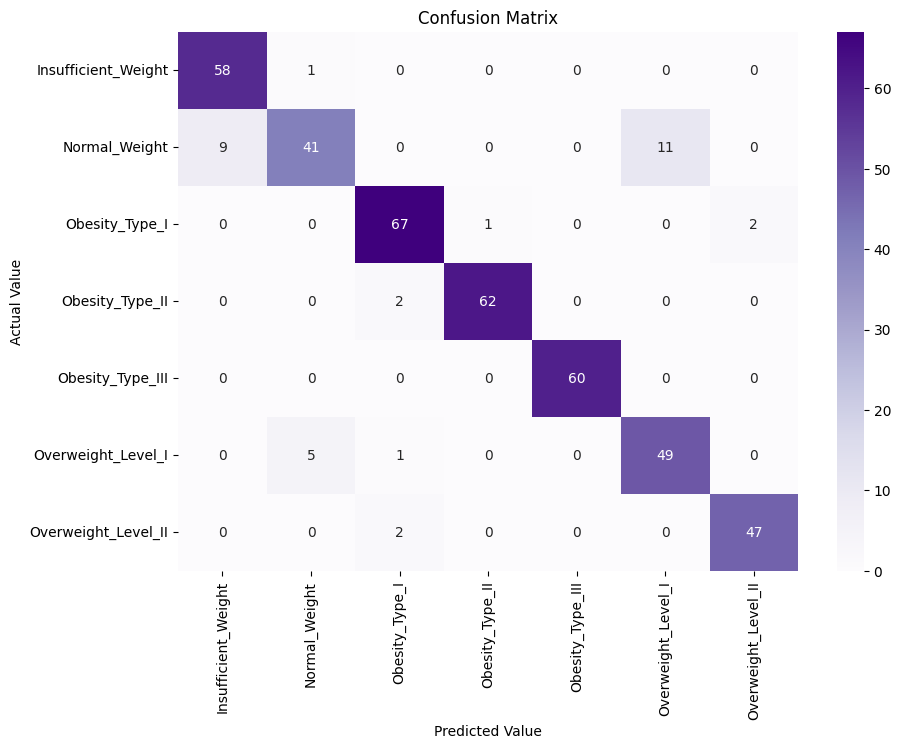

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoders['NObeyesdad'].classes_, yticklabels=label_encoders['NObeyesdad'].classes_)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

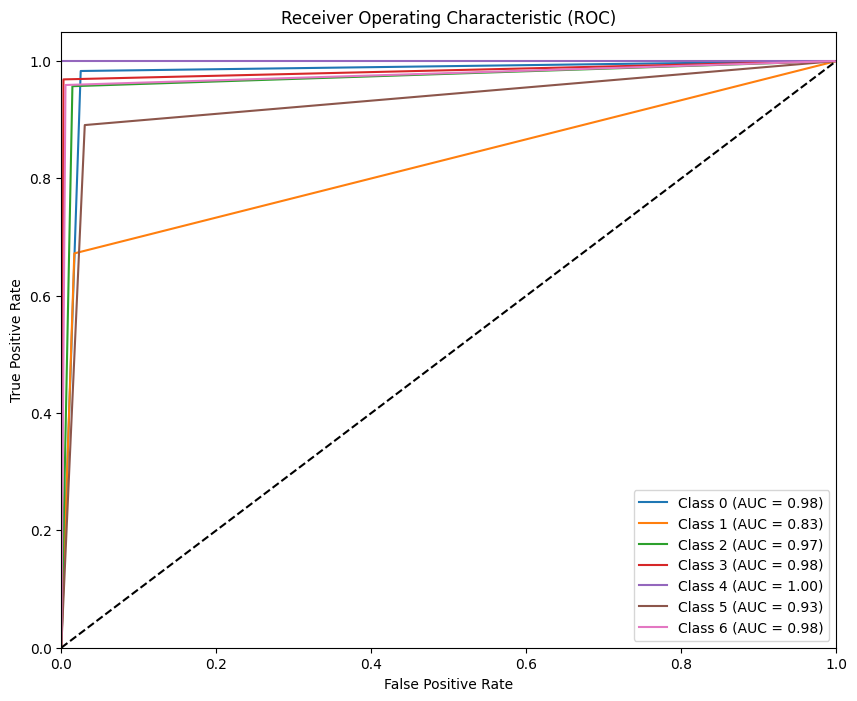

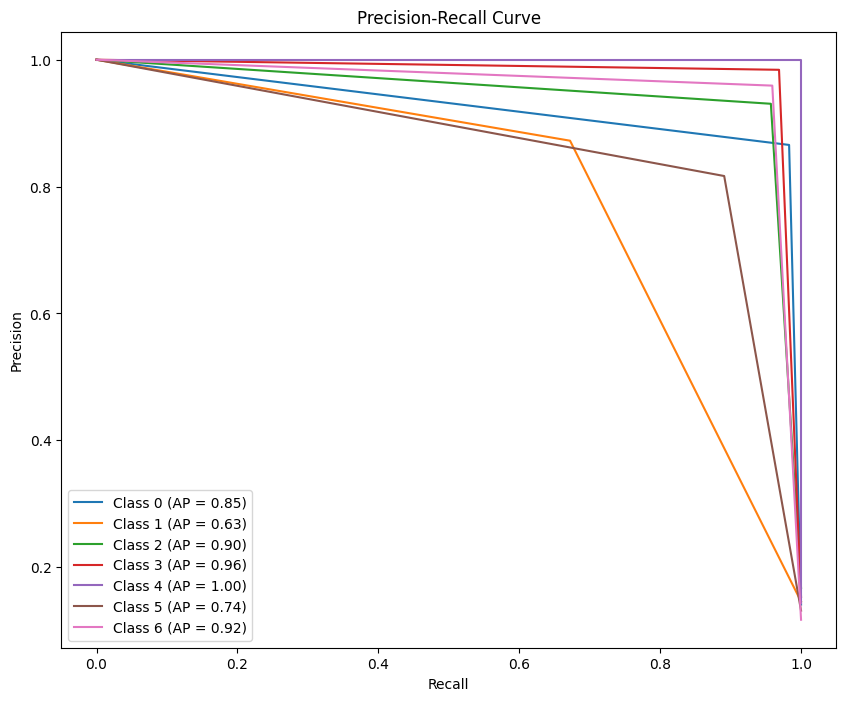

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

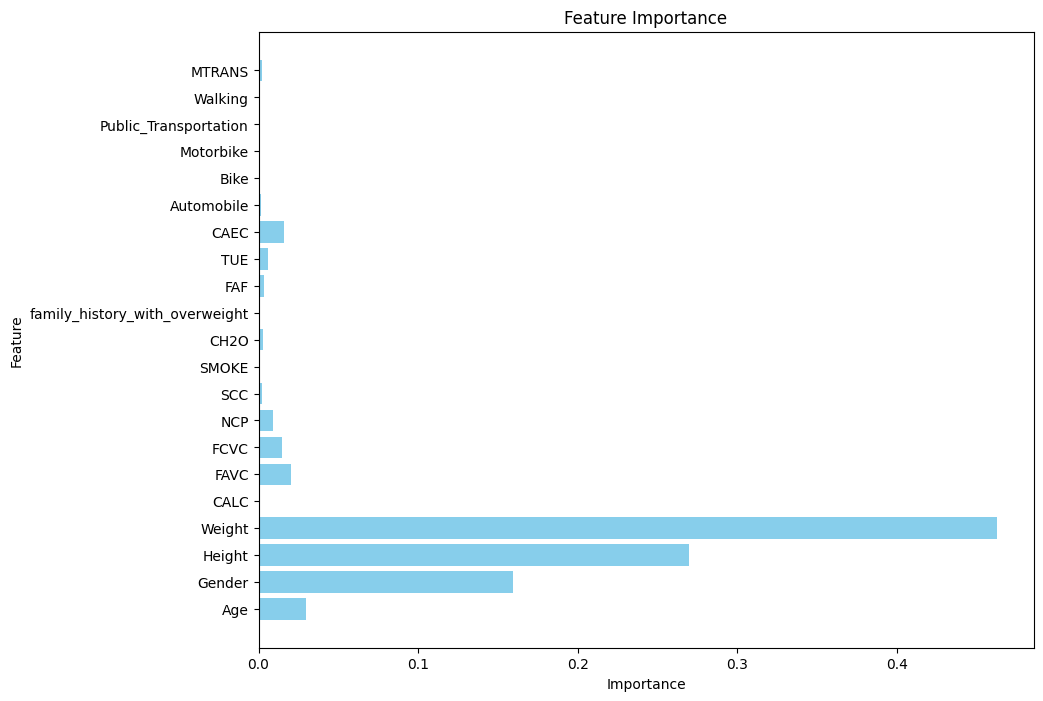

In [ ]:
feature_importance = clf.feature_importances_
features = X.columns
# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

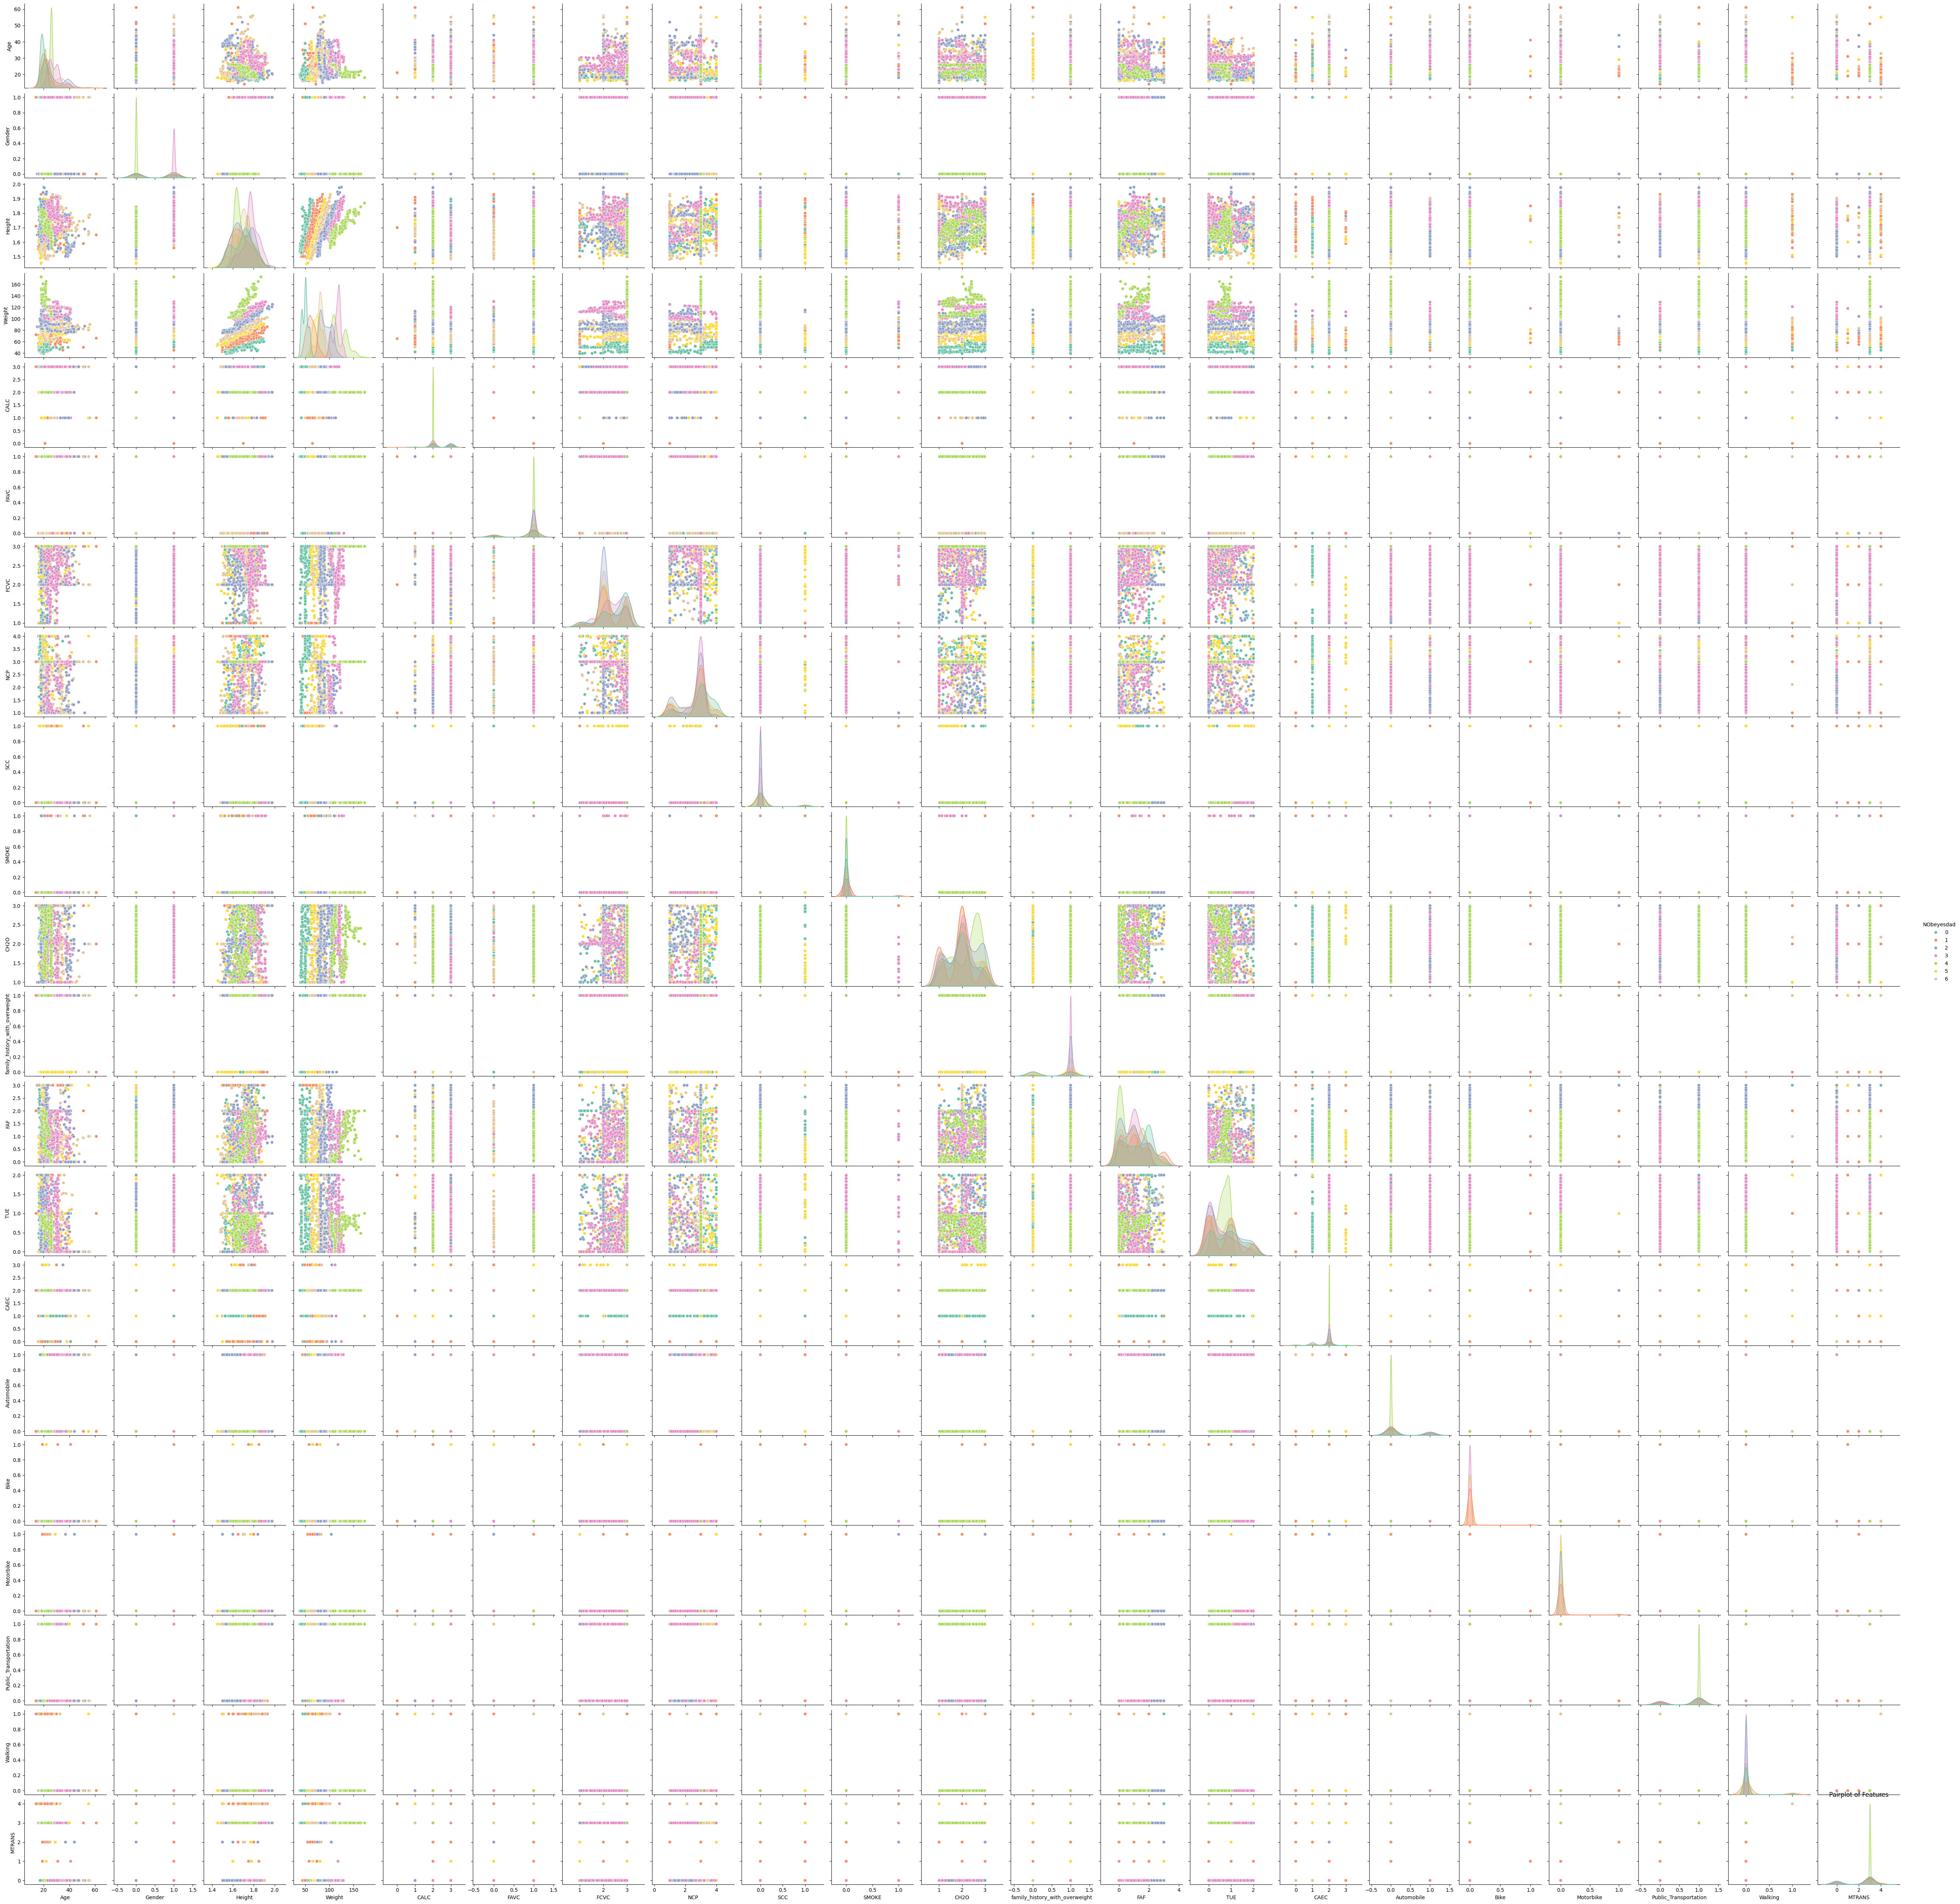

In [ ]:
sns.pairplot(dropped_data, hue='NObeyesdad', diag_kind='kde', palette='Set2')
plt.title('Pairplot of Features')
plt.show()

In [ ]:
import Re